In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [2]:
exercise = pd.read_csv(r'C:\Users\User\Desktop\exercise.csv')
calories = pd.read_csv(r'C:\Users\User\Desktop\calories.csv')

In [3]:
df = pd.merge(exercise, calories, on='User_ID')

In [5]:
df = df[df['Calories'] < 300]

In [7]:
df = df.reset_index()

In [8]:
df['Intercept'] = 1

In [9]:
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


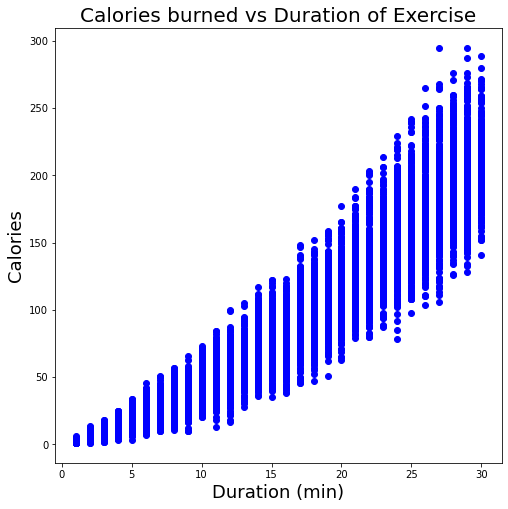

In [10]:
plt.figure(figsize=(8,8))

plt.plot(df['Duration'], df['Calories'], 'bo')
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [11]:
X = df.loc[:,['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
reg.score(X_test, y_test)

0.9127565443594695

In [20]:
pred = reg.predict(X_test)

In [19]:
from sklearn import metrics

In [21]:
metrics.r2_score(y_test, pred)

0.9127565443594695

In [22]:
metrics.mean_squared_error(y_test, pred)

335.6563584197786

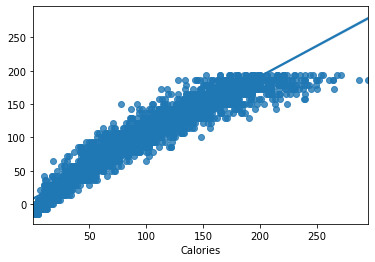

In [24]:
sns.regplot(y_test, pred)

In [25]:
reg.coef_

array([0.        , 7.17988652])

In [26]:
reg.intercept_

-21.91675592768638